<a href="https://colab.research.google.com/github/sakshijadhav1103/defence_p2/blob/main/Change_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import cv2
import os
import shutil
import io
from PIL import Image
import zipfile
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
zip_A_path='/content/gdrive/MyDrive/Google_earth/A.zip'
zip_B_path='/content/gdrive/MyDrive/Google_earth/B.zip'

In [ ]:
# Function to extract images from a zip file
def extract_images_from_zip(zip_path):
    images = []
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        for file_info in zip_ref.infolist():
            with zip_ref.open(file_info) as file:
                image = Image.open(io.BytesIO(file.read()))
                images.append(np.array(image))
    return images

In [ ]:
# Extract images from the zip folders
images_A = extract_images_from_zip(zip_A_path)
images_B = extract_images_from_zip(zip_B_path)

In [ ]:
# Function to create two-phase image pairs
def create_image_pairs(images_A, images_B):
    image_pairs = []
    for img_A, img_B in zip(images_A, images_B):
        image_pairs.append((img_A, img_B))
    return np.array(image_pairs)

In [ ]:
# Create two-phase image pairs
image_pairs = create_image_pairs(images_A, images_B)

In [ ]:
print("Image pairs shape:", image_pairs.shape)

Image pairs shape: (445, 2, 1024, 1024, 3)


In [ ]:
# Function to visualize image pairs
def visualize_image_pairs(image_pairs, num_pairs=5):
    plt.figure(figsize=(15, 5 * num_pairs))
    for i in range(num_pairs):
        for j in range(2):
            plt.subplot(num_pairs, 2, i * 2 + j + 1)
            plt.imshow(image_pairs[i, j])
            plt.axis('off')
            plt.title(f"Period {j} - Pair {i}")
    plt.show()

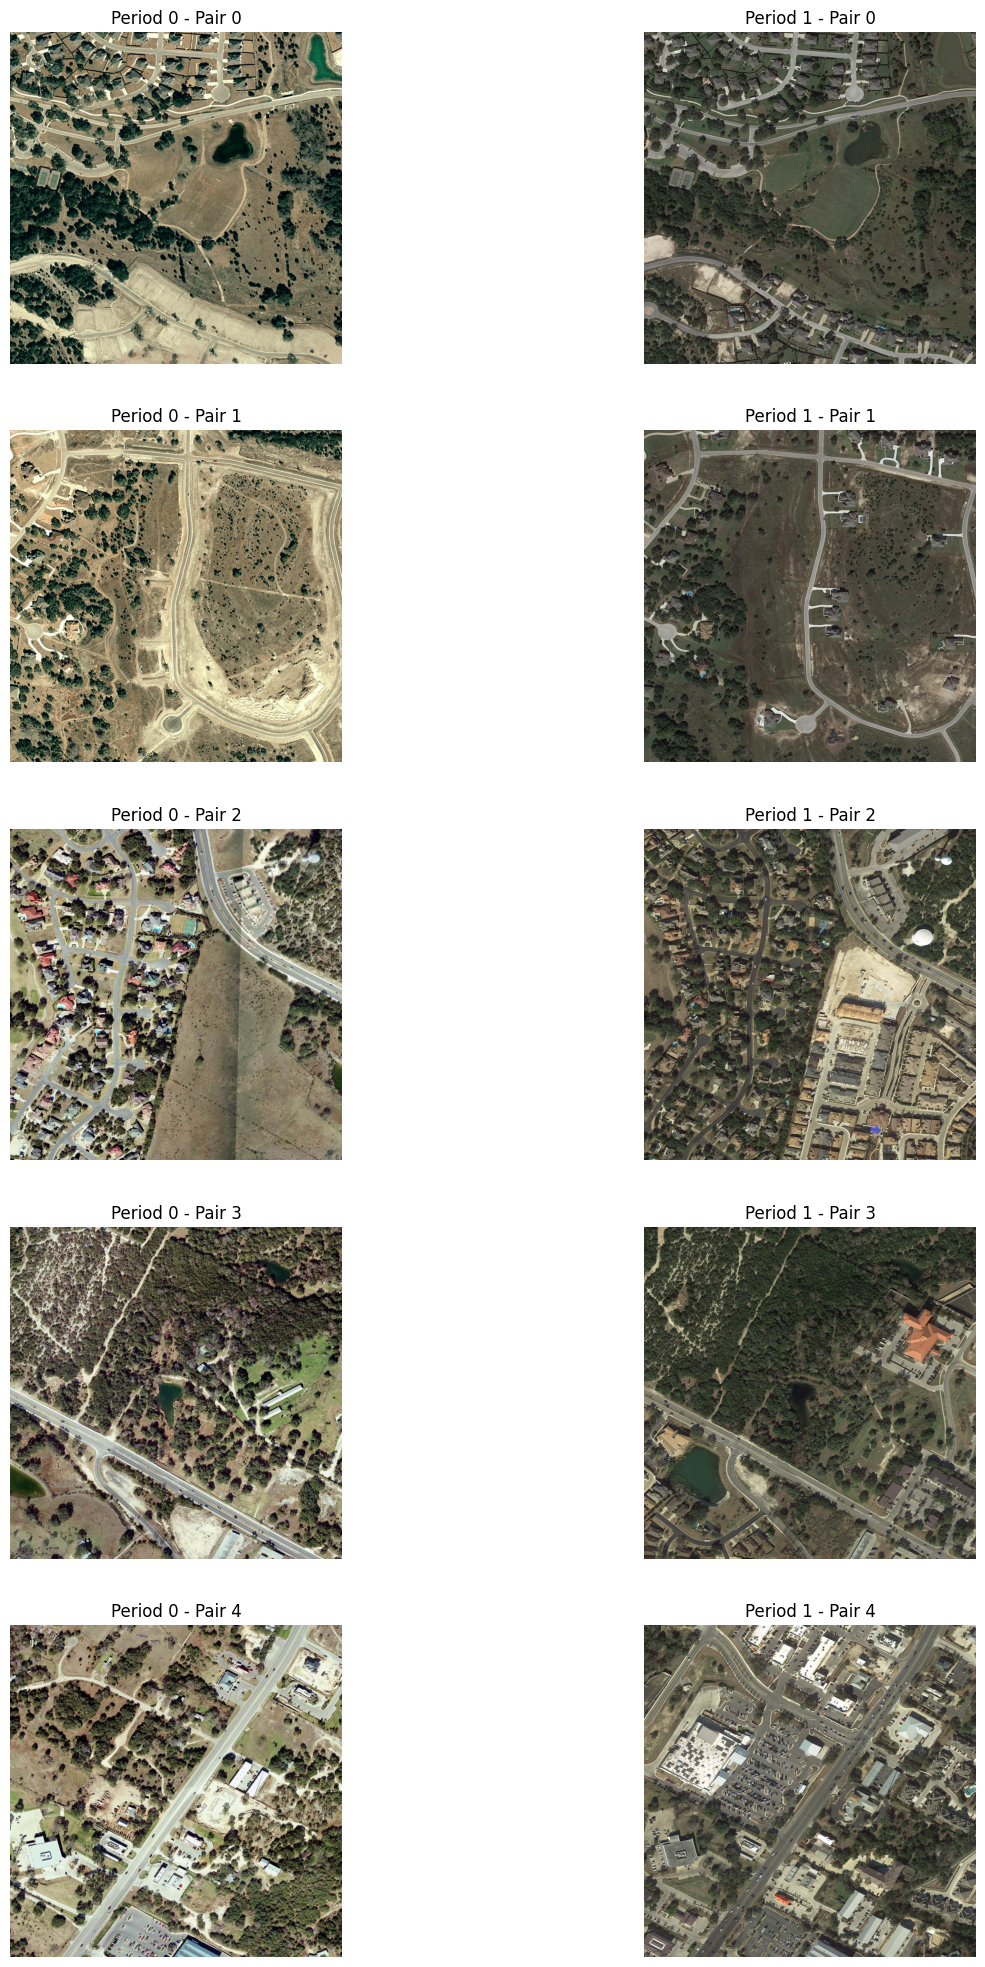

In [ ]:
# Visualize the first 5 pairs
visualize_image_pairs(image_pairs, num_pairs=5)